In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -----------------------------
# Fonctions Black-Scholes (Call)
# -----------------------------
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return price

def bs_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

def bs_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))

def bs_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T) / 100  # en % de vol

def bs_theta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    theta = (
        -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
        - r * K * np.exp(-r * T) * norm.cdf(d2)
    )
    return theta / 365  # par jour


In [4]:

# Paramètres de l'option

S0 = 100      # spot initial
K = 100       # strike
T = 0.5       # maturité (6 mois)
r = 0.02      # taux sans risque (2%)
sigma = 0.20  # volatilité (20%)


# Grille de spot
spot_grid = np.linspace(60, 140, 100)


prices = [bs_call_price(S, K, T, r, sigma) for S in spot_grid]
deltas = [bs_delta(S, K, T, r, sigma) for S in spot_grid]
gammas = [bs_gamma(S, K, T, r, sigma) for S in spot_grid]
vegas  = [bs_vega(S, K, T, r, sigma) for S in spot_grid]
thetas = [bs_theta(S, K, T, r, sigma) for S in spot_grid]

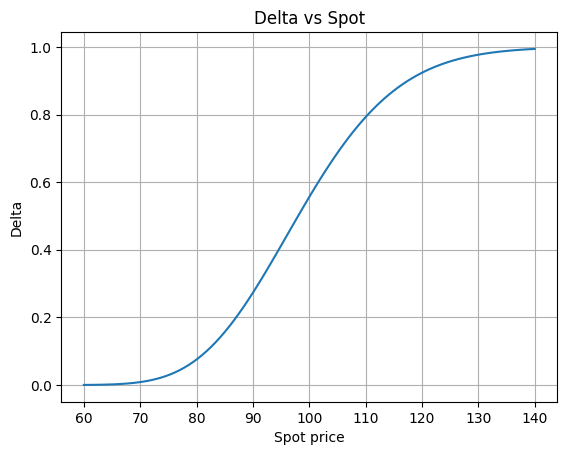

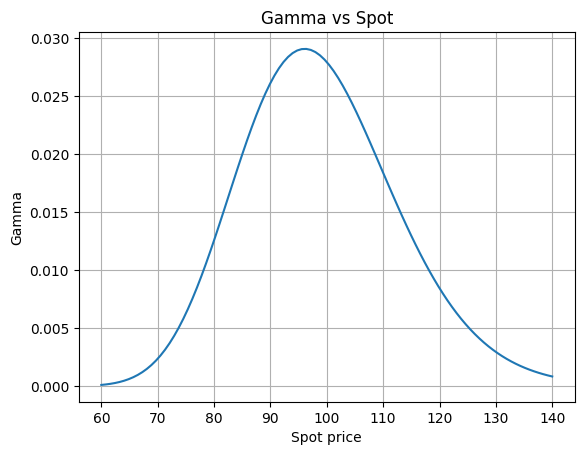

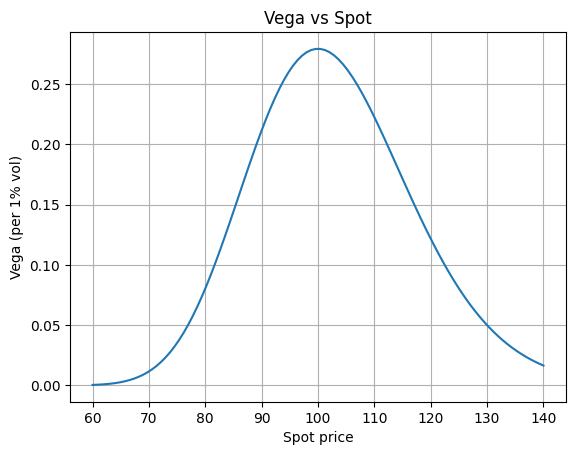

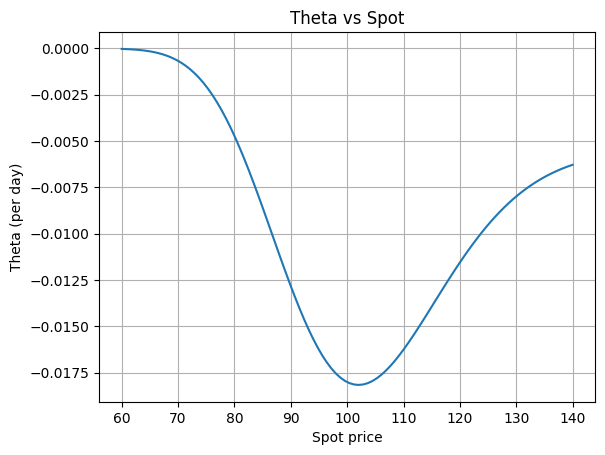

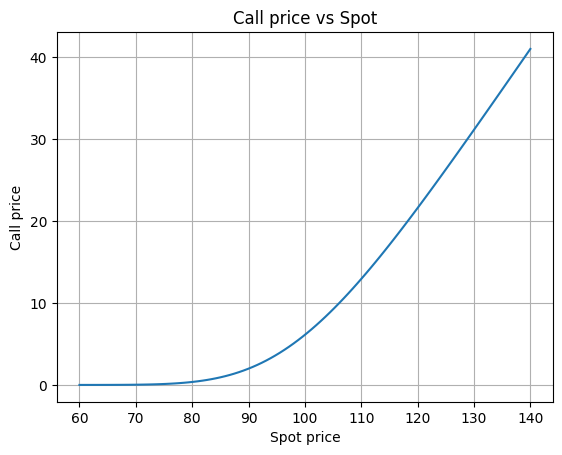

In [8]:
# Delta vs Spot
plt.figure()
plt.plot(spot_grid, deltas)
plt.title("Delta vs Spot")
plt.xlabel("Spot price")
plt.ylabel("Delta")
plt.grid(True)
plt.show()

# Gamma vs Spot
plt.figure()
plt.plot(spot_grid, gammas)
plt.title("Gamma vs Spot")
plt.xlabel("Spot price")
plt.ylabel("Gamma")
plt.grid(True)
plt.show()

# Vega vs Spot
plt.figure()
plt.plot(spot_grid, vegas)
plt.title("Vega vs Spot")
plt.xlabel("Spot price")
plt.ylabel("Vega (per 1% vol)")
plt.grid(True)
plt.show()

# Theta vs Spot
plt.figure()
plt.plot(spot_grid, thetas)
plt.title("Theta vs Spot")
plt.xlabel("Spot price")
plt.ylabel("Theta (per day)")
plt.grid(True)
plt.show()

# Price vs Spot
plt.figure()
plt.plot(spot_grid, prices)
plt.title("Call price vs Spot")
plt.xlabel("Spot price")
plt.ylabel("Call price")
plt.grid(True)
plt.show()

